# Day 17

In [493]:
import numpy as np

EMPTY   = 0
CLAY    = 1
FLOWING = 2
STILL   = 3

def getGrid(filename):
    coord = []
    with open(filename) as f:
        for c in [ l.strip("\n").split(", ") for l in f.readlines() ]:
            c1 = int(c[0][2:])
            c2 = [ int(i) for i in c[1][2:].split("..") ]
            for j in range(c2[0],c2[1]+1):
                if c[0][:1]=="x":
                    coord.append((c1,j))
                else:
                    coord.append((j,c1))
    
    c = np.array(coord)
    xmin = min(c[:,:-1])[0]-2 # enlarge left and right to allow water to flow around most external basins
    xmax = max(c[:,:-1])[0]+2
    ymin = min(c[:,1:])[0]
    ymax = max(c[:,1:])[0]
    
    grid = np.zeros((ymax-ymin+1,xmax-xmin+1),dtype=int)
    for x,y in coord:
        grid[y-ymin,x-xmin] = CLAY
    
    # place source at level with highest clay square
    source = (500-xmin,0)
    grid[0,500-xmin] = FLOWING
    
    return grid,coord,source

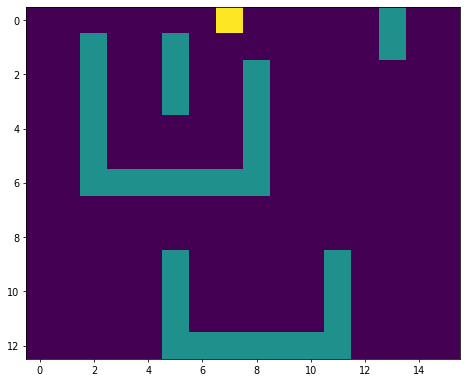

In [502]:
import matplotlib.pyplot as plt

filename = "data/day17text.txt"
#filename = "data/input17.txt"

grid,coord,source = getGrid(filename)

plt.figure(figsize=(8,8),dpi=70)
img = plt.imshow(grid)

In [503]:
def down(s):
    '''returns coordinate in flow direction (down)'''
    return tuple( [ c+d  for c,d in zip(s,(0,+1))] )

def fillHoriz(s,grid):
    xs,ys = s
    
    # check if some other flowing point has already filled the neigbouring space in both directions
    if grid[ys,xs-1]==FLOWING and grid[ys,xs+1]==FLOWING:
        # This check alone is ok only if the flow is really flowing, and it's not a "fake flow" in specific 
        # basins configuration when two flow flushes arrives ar the same time. For those a specific check is neded
        flowL = False
        flowR = False 
        # check for real flow left
        xh = xs
        while True: # look left from xs
            if grid[ys,xh]==FLOWING: # below I have clay or still water
                xh -= 1
            elif grid[ys,xh]==EMPTY:
                flowL = True
                break
            elif grid[ys,xh]==CLAY or grid[ys,xh]==STILL:
                break
        # check for real flow right
        xh = xs
        while True: # look left from xs
            if grid[ys,xh]==FLOWING: # below I have clay or still water
                xh += 1
            elif grid[ys,xh]==EMPTY:
                flowR = True
                break
            elif grid[ys,xh]==CLAY or grid[ys,xh]==STILL:
                break
        if flowL or flowR:
            return []
        
    # Look left and right to see whether water can settle or flow down
    xsetl = xsetr = -1
    xflol = xflor = -1
    xh = xs
    while True: # look left from xs
        if grid[ys+1,xh]==STILL or grid[ys+1,xh]==CLAY: # below I have clay or still water
            xh -= 1
            if grid[ys,xh]==CLAY:
                xsetl = xh+1
                break
        elif grid[ys+1,xh]==EMPTY: # void below
            xflol = xh
            break
        elif grid[ys+1,xh]==FLOWING: # already flowing
            xflol = xh
            break    
    xh = xs
    while True: # look right from xs
        if grid[ys+1,xh]==STILL or grid[ys+1,xh]==CLAY: # below I have clay or still water
            xh += 1
            if grid[ys,xh]==CLAY:
                xsetr = xh-1
                break
        elif grid[ys+1,xh]==EMPTY: # void below
            xflor = xh
            break
        elif grid[ys+1,xh]==FLOWING: # already flowing
            xflor = xh
            break
    # fill accordingly and return new flowing points
    if xsetl != -1 and xsetr != -1: # water can settle
        grid[ys,xsetl:xsetr+1]=STILL
        return [(xs,ys-1)]
    elif xflol!=-1 and xflor !=-1:  # can flow down on both sides
        grid[ys,xflol:xflor+1]=FLOWING
        return [(xflol,ys-1),(xflor,ys-1)]
    elif xflol==-1 and xflor !=-1:  # can flow down on the right only
        grid[ys,xsetl:xflor+1]=FLOWING
        return [(xflor,ys-1)]
    elif xflol!=-1 and xflor ==-1:  # can flow down on the left only
        grid[ys,xflol:xsetr+1]=FLOWING
        return [(xflol,ys-1)]
    else:
        return []

def flowWater(grid,source):
    flow = [source]
    while len(flow):
        flownew = []
        for f in flow:
            xf,yf = f
            if yf>=len(grid)-1: # reached lower end of grid
                continue
            xn,yn = down(f)
            if grid[yn,xn]==CLAY or grid[yn,xn]==STILL: # Clay or still water found, filling horizontally
                fn = fillHoriz(f,grid) # returning list of flowing points
                if len(fn):
                    flownew += fn
                else:
                    continue
            else:
                grid[yn,xn] = FLOWING
                flownew.append((xn,yn))
        flow = sorted(flownew,key=lambda X: X[1],reverse=True)
    return grid

Tiles water can reach    = 57
Water after spring stops = 29


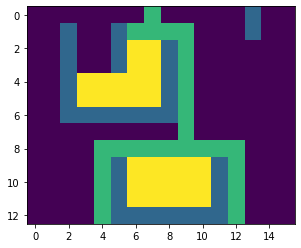

In [514]:
filename = "data/day17text.txt"
grid,_,source = getGrid(filename)
grid = flowWater(grid,source)
img = plt.imshow(grid)
reach = sum(grid[grid==FLOWING]//FLOWING) + sum(grid[grid==STILL]//STILL)# remove source
print("Tiles water can reach    =",reach)
rest = sum(grid[grid==STILL]//STILL)
print("Water after spring stops =",rest)

In [516]:
filename = "data/input17.txt"
grid,_,source = getGrid(filename)
grid = flowWater(grid,source)
reach = sum(grid[grid==FLOWING]//FLOWING) + sum(grid[grid==STILL]//STILL) # remove source
print("Tiles water can reach    =",reach)
rest = sum(grid[grid==STILL]//STILL)
print("Water after spring stops =",rest)

Tiles water can reach    = 36171
Water after spring stops = 28204


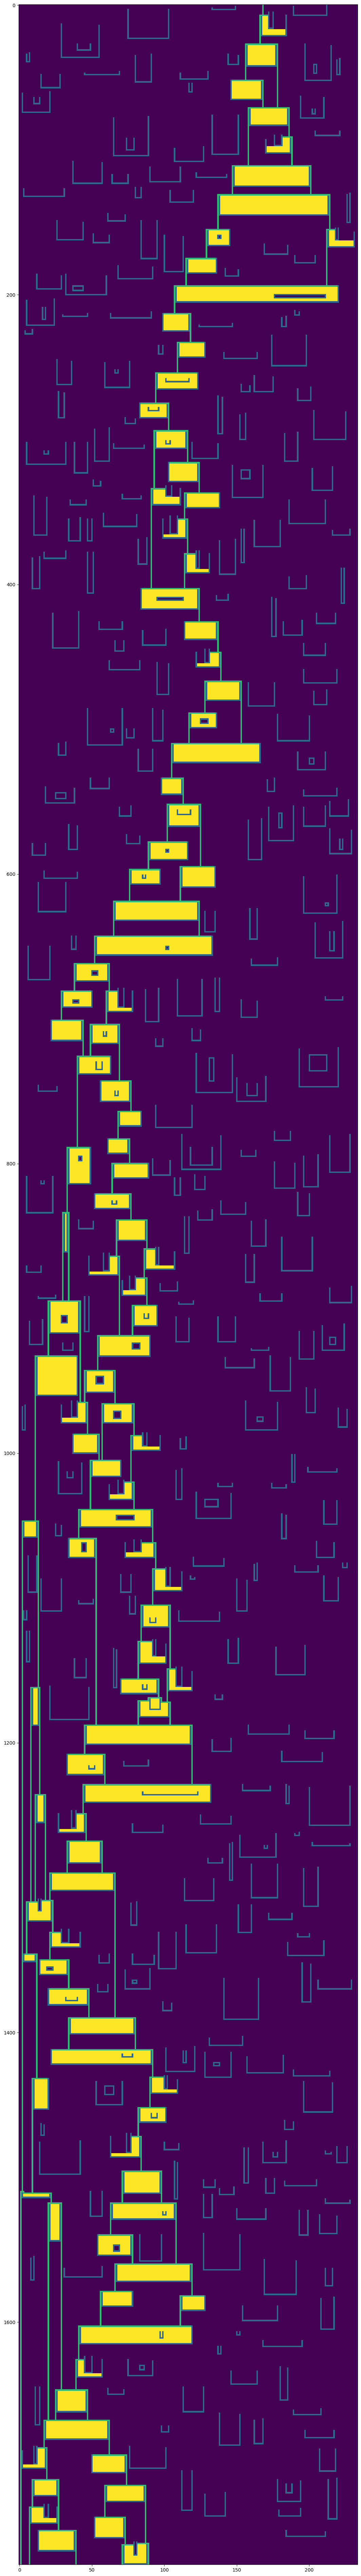

In [517]:
plt.figure(figsize=(100,100),dpi=100)
img = plt.imshow(grid)